<a href="https://colab.research.google.com/github/nihalhabeeb/Health_Insurance_Cross_Sell_Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

#### Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.
#### An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.
#### For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.
#### Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.
#### Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.
#### Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response (target) :	1 : Customer is interested, 0 : Customer is not interested

####**What is cross selling?**

#### It is the process of offering an existing customer a product that is similar or compatible to the product that they already purchased.

#### Acquiring a new customer is harder than retaining existing customers, which makes customer relationship a very important aspect for any business.

#### Cross selling can be an effective method to strengthen the relationship with the customer while also boosting the revenue of the business. When rightly done, it can:
#### 1. improve the customer's experience with the existing product, or
#### 2. solve some new problems for them.

#### **Planning cross selling strategy**

#### It is important to know which customer might be interested or uninterested in a product while planning the cross selling process. This helps to:
#### 1. avoid any potential negative effects on the customer relationship due to the cross selling advertisement.
#### 2. make efficient use of the communication and marketing efforts.

#### So we will use the data of past health insurance policy holders of our client to build models that can classify a customer as 'Interested" or "Not interested" in the vehicle insurance.

In [6]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from xgboost import XGBClassifier

sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [7]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Health Insurance Cross Sell Prediction - Nihal Habeeb/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
data.shape

(381109, 12)

#### The dataset contains 381109 rows and 12 columns including the target variable.

In [9]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Let us get information regarding missing values.

In [10]:
# checking the data type and non null value count of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### There are no null values in any of the columns.
#### We can also check if there are any duplicates in the dataframe.

In [11]:
data[data.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


#### There are no duplicates in the dataframe.

**Descriptive Statistics**

In [12]:
# statistical summary of numerical variables
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


We can see Driving_License and Previously_Insured might be binary categorical variables which are in numerical form (0 and 1). In addition, most of the driving license data is 1 (the lower quartile itself is 1).

## **Exploratory Data Analysis**

### **Response (target variable)**

[Text(0, 0, 'Not Interested'), Text(0, 0, 'Interested')]

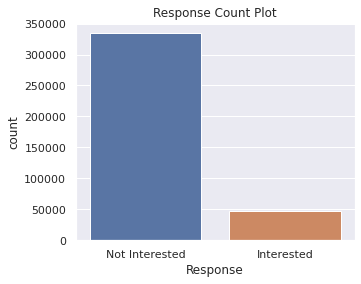

In [13]:
fig = plt.figure(figsize = (5,4))
ax = fig.gca()
sns.countplot(data['Response'])
plt.title("Response Count Plot")
ax.xaxis.set_ticklabels(["Not Interested", "Interested"])

The data is unbalanced. There are very few interested customers (less than 50000) in comparison to uninterested customers (nearly 350000).

Let us explore all the variables in detail.

In [14]:
# numerical varibles
data.describe().columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

**Note:** id does not provide any relevant insight on the data as it is just unique index.

#### **Age**

Text(0.5, 1.0, 'Distribution of Age')

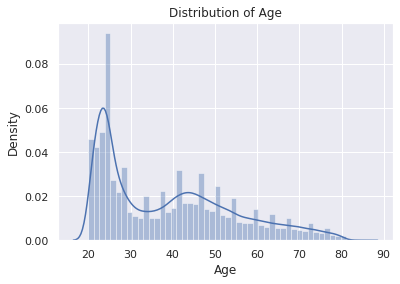

In [15]:
# distribution of age variable
sns.distplot(data['Age'])
plt.title("Distribution of Age")

The distribution is positively skewed with a peak around 25 years and a second peak around 45. More of the customers in the dataset are towards their thirties or less.

Text(0.5, 1.0, 'Boxplot of Age Variable')

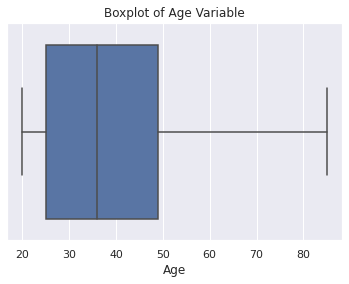

In [16]:
sns.boxplot(data['Age'])
plt.title("Boxplot of Age Variable")

The box plot confirms the skew and also shows the absence of outliers.

Text(0.5, 1.0, 'Distribution of Age (for both response class)')

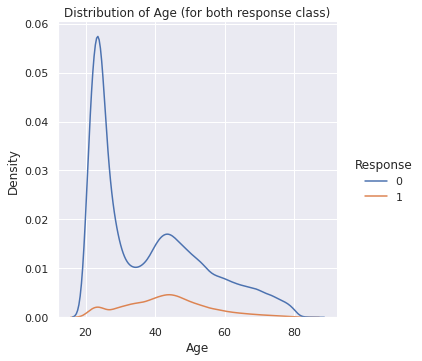

In [17]:
# Interested and uninterested customers count across age
sns.displot(x = 'Age', hue = 'Response', data = data, kind = 'kde')
plt.title("Distribution of Age (for both response class)")

Here we look at a detailed plot of response count across age. Eventhough more of the customers are young, the number of interested customers among the youngsters in relation to the uninterested customers are way less in comparison to the older (or middle-aged) customers. There could be multiple possible reasons, such as lack of seriousness about vehicle safety, or simply because their vehicles are inexpensive as opposed to that of the middle-aged section.

We can see both interested and uninterested customer numbers reducing as we go to the other end. Very old people are less likely to drive and hence want a vehicle insurance.

### **Driving License**

In [18]:
# count of customers with and without DL
data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

Most of the customers have driving license.

[Text(0, 0, 'No DL'), Text(0, 0, 'DL')]

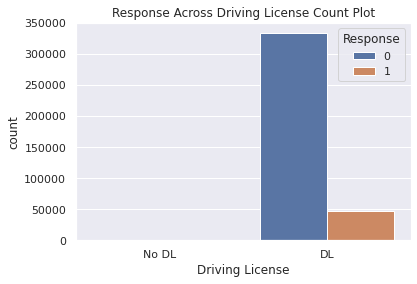

In [19]:
fig = plt.figure(figsize = (6,4))
ax = fig.gca()
# response count for customers with and without DL
sns.countplot(data['Driving_License'],hue=data['Response'])
plt.title("Response Across Driving License Count Plot")
plt.xlabel("Driving License")
ax.xaxis.set_ticklabels(['No DL','DL'])

As we know, the number of customers without DL is very low (hence not visible in the plot). Out of the customers with DL, most of them are uninterested (we already know that the total number of interested customers is very less).

In [20]:
# count of interested customers with and without DL
data.groupby('Driving_License')['Response'].sum()

Driving_License
0       41
1    46669
Name: Response, dtype: int64

Only 41 of the 812 customers without DL are interested in vehicle insurance.

We can also explore the age-wise distribution of people with DL in order to compare it with our earlier plot of age-wise distribution of response.

In [21]:
# number of customers with DL across age (sorted)
data.groupby('Age')['Driving_License'].sum().sort_values(ascending = False)

Age
24    25959
23    24256
22    20964
25    20636
21    16456
      ...  
81       50
82       26
83       21
84       10
85       10
Name: Driving_License, Length: 66, dtype: int64

Text(0.5, 1.0, 'Distribution of customers with DL across age')

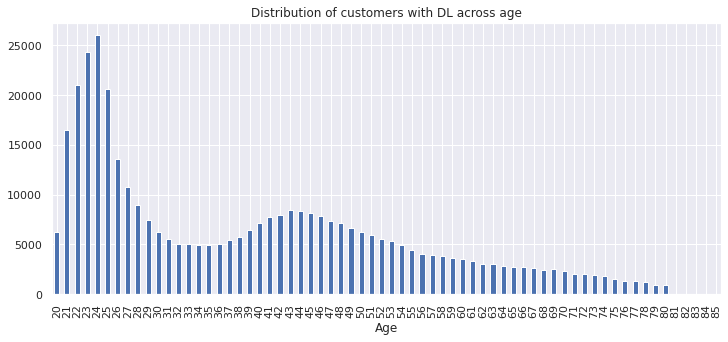

In [22]:
# distribution of customers with DL across age
plt.figure(figsize=(12,5))
data.groupby('Age')['Driving_License'].sum().plot(kind = 'bar')
plt.title("Distribution of customers with DL across age")

This mirrors the overall age distribution of customers in the data. The low count of customers with DL among older people might explain the lesser number of customers interested in vehicle insurance in that section.

### **Region Code**

Region code is a unique code (number) referring to the customer's region. From the descriptive statistics we can see it ranges from 0 to 52. 

In [23]:
# descriptive statistics of region code column
data['Region_Code'].describe()

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64

Text(0.5, 0, 'Region Code')

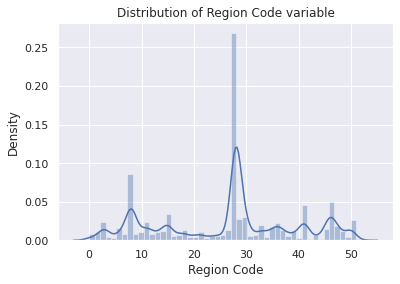

In [24]:
# distribution of Region code
sns.distplot(data['Region_Code'])
plt.title("Distribution of Region Code variable")
plt.xlabel("Region Code")

The distribution is far from normal with multiple peaks throughout.

### **Previously_Insured**

This variable refers to whether the customer already has insured their vehicle previously (1) or not (0).

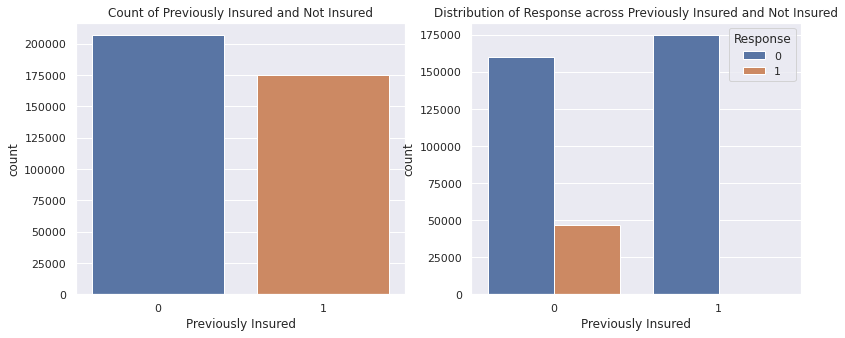

In [25]:
fig = plt.figure(figsize = (13,5))
# count plot of previously insured or not insured
plt.subplot(1,2,1)
sns.countplot(data['Previously_Insured'])
plt.title('Count of Previously Insured and Not Insured')
plt.xlabel("Previously Insured")
# plot of distribution of response across insured and not insured
plt.subplot(1,2,2)
sns.countplot(x = 'Previously_Insured', hue = 'Response', data = data)
plt.title('Distribution of Response across Previously Insured and Not Insured')
plt.xlabel("Previously Insured")
plt.show()

Out of the customers data, the number of customers who did not insure their vehicle previously is higher than those who did.

The section of customers who are not previously insured has a much higher share of interested customers (thus are more likely to opt it).

We can observe that out of the customers who have already insured, almost no one is interested in the vehicle insurance. We can see the exact number below. Only 158 people out of the previously insured are interested.

In [26]:
# number of interested customers out of previously insured and not insured
data.groupby('Previously_Insured')['Response'].sum()

Previously_Insured
0    46552
1      158
Name: Response, dtype: int64

### **Annual Premium**

It refers to the amount the customer has to pay annually.

In [27]:
# descriptive statistics of annual premium
data['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

The annual premium ranges from around 2600 to 5,40,000.

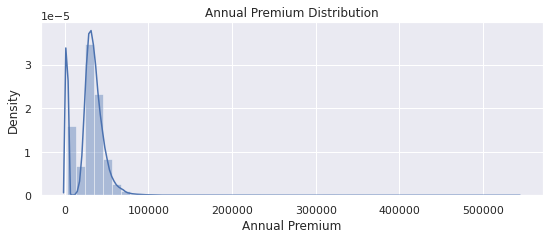

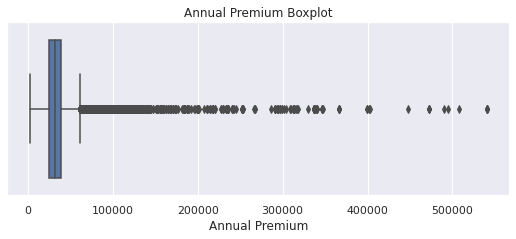

In [28]:
plt.figure(figsize = (9,7))

# distribution of annual premium
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'])
plt.title('Annual Premium Distribution')
plt.xlabel("Annual Premium")
plt.figure(figsize = (9,7))

# boxplot of annual premium
plt.subplot(2,1,2)
sns.boxplot(data['Annual_Premium'])
plt.title('Annual Premium Boxplot')
plt.xlabel("Annual Premium")
plt.show()

The distribution is right skewed but has another peak close to zero. We can observe a lot of outliers (from the boxplot). Some people are paying very high premium (which is far away from the general distribution). The classifier models we are going to use (Logistic Regression, Decision Tree etc.) are not much sensitive to outliers. So, we are not worrying about them.

In [29]:
data['Annual_Premium'].value_counts().sort_values(ascending = False)

2630.0      64877
69856.0       140
39008.0        41
38287.0        38
45179.0        38
            ...  
16882.0         1
102370.0        1
15647.0         1
51800.0         1
69845.0         1
Name: Annual_Premium, Length: 48838, dtype: int64

There are a lot of customers paying annual premium of 2630 leading to the peak near zero.

Text(0.5, 8.95999999999998, 'Annual Premium')

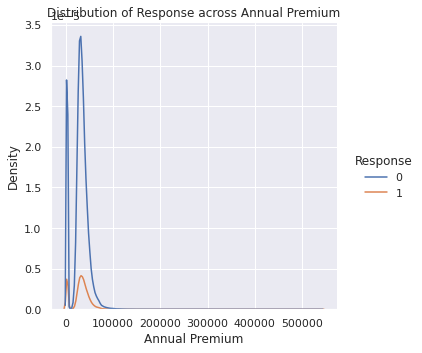

In [30]:
# density estimation using kde
# distribution of interested and uninterested response across annual premium
sns.displot(x = 'Annual_Premium', hue = 'Response', data = data, kind = 'kde')
plt.title('Distribution of Response across Annual Premium')
plt.xlabel("Annual Premium")

Both responses have similar distribution but with the Uninterested customers distribution having much higher magnitude.

### **Policy Sales Channel**

It refers to the anonymized code (as integers) for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. Eventhough they were integers, they were in float format.

In [31]:
data['Policy_Sales_Channel']

0          26.0
1          26.0
2          26.0
3         152.0
4         152.0
          ...  
381104     26.0
381105    152.0
381106    160.0
381107    124.0
381108     26.0
Name: Policy_Sales_Channel, Length: 381109, dtype: float64

In [32]:
# descriptive statistics
data['Policy_Sales_Channel'].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

The value ranges from 1 to 163.

Text(0.5, 0, 'Policy Sales Channel')

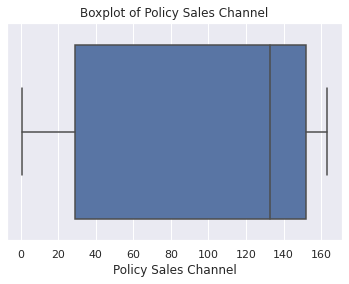

In [33]:
sns.boxplot(data['Policy_Sales_Channel'])
plt.title('Boxplot of Policy Sales Channel')
plt.xlabel("Policy Sales Channel")

There are no oultiers in Policy Sales Channel

Text(0.5, 0, 'Policy Sales Channel')

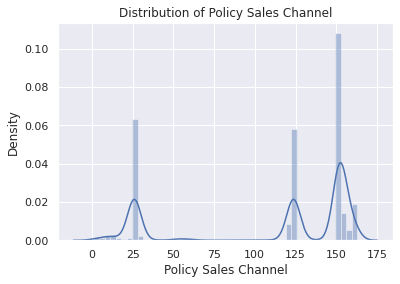

In [34]:
sns.distplot(data['Policy_Sales_Channel'])
plt.title('Distribution of Policy Sales Channel')
plt.xlabel("Policy Sales Channel")

There are multiple peaks in the distribution.

Text(0.5, 8.95999999999998, 'Policy Sales Channel')

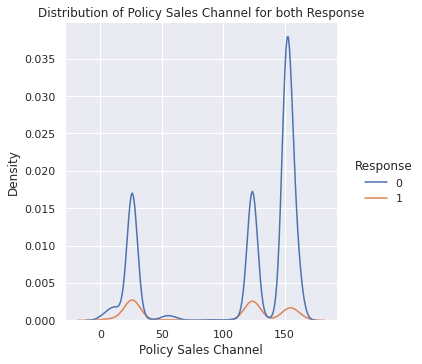

In [35]:
# density estimation using kde
# distribution of interested and uninterested response across Policy Sales Channel
sns.displot(x = 'Policy_Sales_Channel', hue = 'Response', data = data, kind = 'kde')
plt.title('Distribution of Policy Sales Channel for both Response')
plt.xlabel("Policy Sales Channel")

Both responses have similar distribution pattern with the Uninterested customers distribution having much higher magnitude. This implies a few of the policy channels are the most common ones for the customers (regardless of if they're interested or not).

### **Vintage** 

It refers to the number of days the customer has been associated with the company.

In [36]:
# descriptive statistics
data['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

It ranges from 10 days to 299.

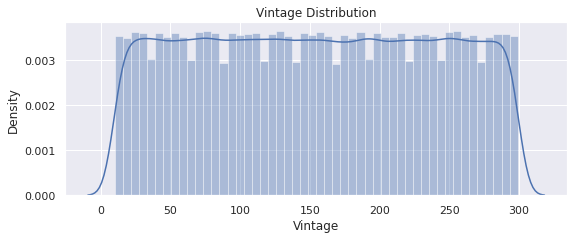

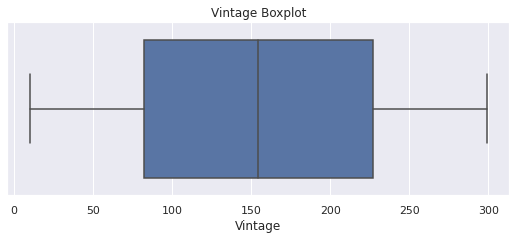

In [37]:
plt.figure(figsize = (9,7))
# distribution plot
plt.subplot(2,1,1)
sns.distplot(data['Vintage'])
plt.title('Vintage Distribution')
plt.figure(figsize = (9,7))
# boxplot
plt.subplot(2,1,2)
sns.boxplot(data['Vintage'])
plt.title('Vintage Boxplot')
plt.show()

The distribution of customers across vintage is almost uniform. We observe no outliers as well.

### **Gender**

It is a categorical variable referring to the gender of the customer.

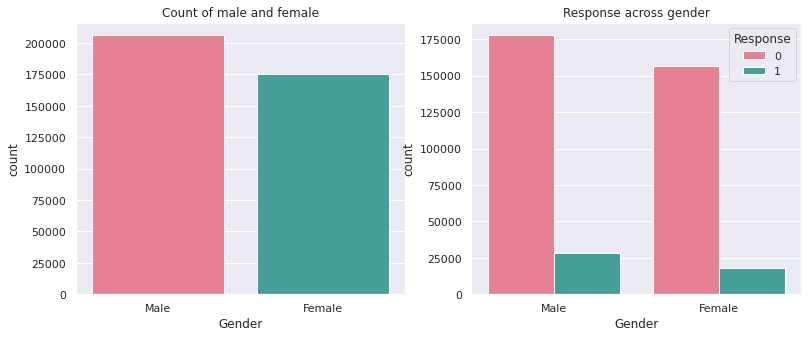

In [38]:
plt.figure(figsize = (13,5))
# count plot
plt.subplot(1,2,1)
sns.countplot(data['Gender'],palette='husl')
plt.title("Count of male and female")
# plot of response across gender
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue = data['Response'],palette="husl")
plt.title("Response across gender")
plt.show()

The number of males (200000) is slightly more than females (175000). The number of males who are interested is greater than 25000 and the number of females who are interested is below 25000. It doesn't necessarily imply that males have a higher tendency to buy insurance and could most likely be a result of total number of men being higher than total number of women in the data (original data of policy holders).

In [39]:
# number of males and females with driving license
data.groupby('Gender')['Driving_License'].sum()

Gender
Female    174808
Male      205489
Name: Driving_License, dtype: int64

Text(0, 0.5, 'Count')

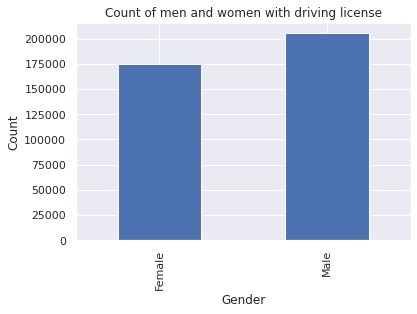

In [40]:
# plot of number of males and females with driving license
data.groupby('Gender')['Driving_License'].sum().plot(kind = 'bar')
plt.title('Count of men and women with driving license')
plt.ylabel('Count')

The number of males with DL is greater. This could be one reason for the lesser number of women interested in vehicle insurance.

Text(0.5, 1.0, 'Distribution of customers across age (men and women)')

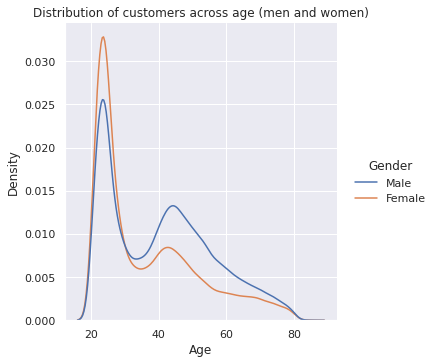

In [41]:
# distribution of customers across age for both men and women 
sns.displot(x = 'Age', hue = 'Gender', data = data, kind = 'kde')
plt.title('Distribution of customers across age (men and women)')

We can observe that in case of younger people (20-30 years) there are more women than men in the data of policy holders while in case of older people it is lesser.

Text(0.5, 1.0, 'Count of previously Insured and not insured (across gender)')

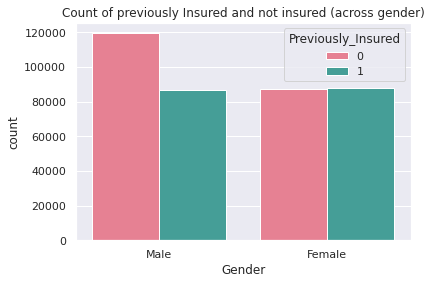

In [42]:
# customers who are/are not previously insured differentiated by gender 
sns.countplot(data['Gender'], hue = data['Previously_Insured'],palette="husl")
plt.title('Count of previously Insured and not insured (across gender)')

In case of males, there are much more customers who did not previously have vehicle insurance while in case of females, the number is balanced.

### **Age of Vehicle**

It is a categorical variable with three categories referring to the age of the vehicle.

In [43]:
# count of each categories
data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

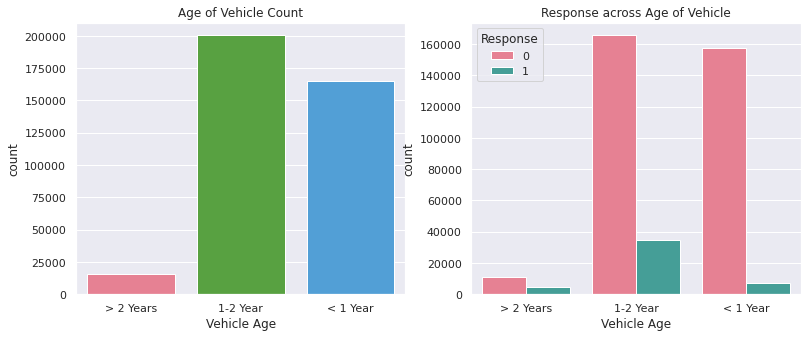

In [44]:
plt.figure(figsize = (13,5))

# plot of count of each categories
plt.subplot(1,2,1)
sns.countplot(data['Vehicle_Age'],palette='husl')
plt.title("Age of Vehicle Count")
plt.xlabel('Vehicle Age')

# plot of response across each categories
plt.subplot(1,2,2)
sns.countplot(data['Vehicle_Age'], hue = data['Response'],palette="husl")
plt.title("Response across Age of Vehicle")
plt.xlabel('Vehicle Age')

plt.show()

In the data, most costumers have their vehicle age between 1 and 2 years. We can also observe that the number of interested customers is also highest for this category (1-2 years). To find the percentage of interested customers across the three categories, we can use cross tabulation.

In [45]:
# crosstabulation between vehicle age and response
pd.crosstab(data['Vehicle_Age'],data['Response']).rename(columns = {0:'Not Interested',1:'Interested'})

Response,Not Interested,Interested
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


In case of vehicle age 1-2 years category, the number of interested customers is 34806 and uninterested customers is 165510 while in case of vehicle age >2 years category, interested customers is only 4702 and uninterested customers is 11305. We can compute the percentage of interested customers for each vehicle age category.

In [46]:
# crosstabulation dataframe
vehicle_age_response_df = pd.crosstab(data['Vehicle_Age'],data['Response'])
# total customers in each category
vehicle_age_response_df['Total'] = vehicle_age_response_df[0] + vehicle_age_response_df[1]
# percentage of interested customers in each category
vehicle_age_response_df['Percentage of Interested'] = (vehicle_age_response_df[1]/(vehicle_age_response_df['Total']))*100

In [47]:
vehicle_age_response_df

Response,0,1,Total,Percentage of Interested
Vehicle_Age,,,,
1-2 Year,165510,34806,200316,17.375547
< 1 Year,157584,7202,164786,4.370517
> 2 Years,11305,4702,16007,29.374649


We observe that '>2 years' is the category with the highest percentage of interested customers (eventhough the actual numbers are lower than the other categories) followed by '1-2 years' and finally '<1 year'.

### **Vehicle Damage**

Refers to whether the customer got his/her vehicle damaged in the past or not.

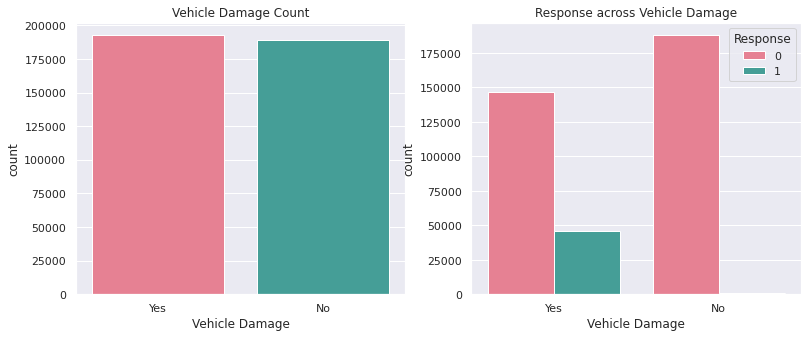

In [48]:
plt.figure(figsize = (13,5))

# count plot of vehicle damaged and not damaged
plt.subplot(1,2,1)
sns.countplot(data['Vehicle_Damage'],palette='husl')
plt.title("Vehicle Damage Count")
plt.xlabel("Vehicle Damage")

# plot of response across vehicle damage
plt.subplot(1,2,2)
sns.countplot(data['Vehicle_Damage'], hue = data['Response'],palette="husl")
plt.title("Response across Vehicle Damage")
plt.xlabel("Vehicle Damage")
plt.show()

The number of customers who had their vehicle damaged in the past and that of customers who did not have it damaged is around the same.

Most of the customers who did not have their vehicle damaged are not interested in the insurance (almost no customers are interested). While in case of customers who did have their vehicle damaged, close to 50,000 people are interested in the insurance.

In [49]:
# crosstabulation between vehicle damage and response
pd.crosstab(data['Vehicle_Damage'],data['Response']).rename(columns = {0:'Not Interested',1:'Interested'})

Response,Not Interested,Interested
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


We can see that out of the customers who did not have their vehicle damaged in the past, only 982 are interested.

### **Multicollinearity**

Multicollinearity can be a problem for logistic regression (but Decision Tree, Random Forest etc. are not affected). We can look for multicollinearity between the variables by plotting a correlation heatmap.

Text(0.5, 1.05, 'Correlation Heatmap')

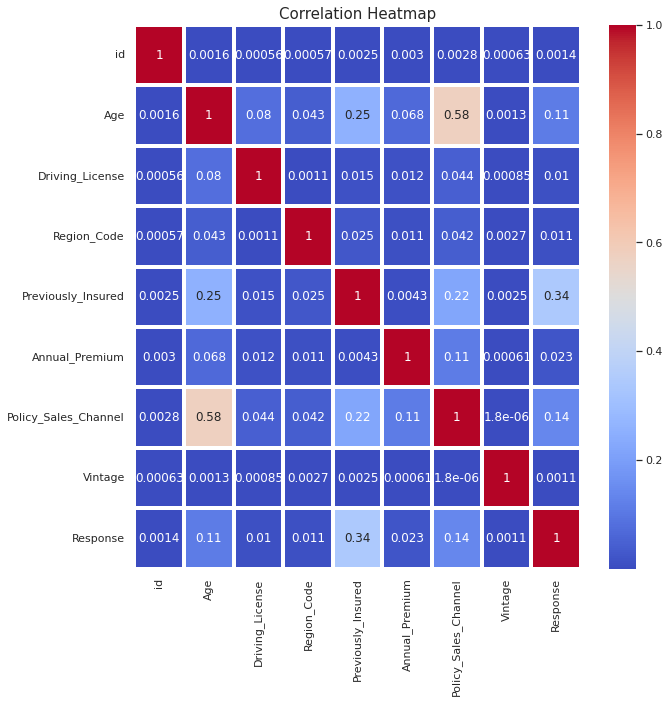

In [50]:
# pair-wise correlation between all variables
corr = data.corr()
plt.figure(figsize = (10,10))
# plotting the heatmap
sns.heatmap(abs(corr), annot=True,linewidths=3,cmap='coolwarm')
plt.title("Correlation Heatmap", y=1.05, size=15)

None of the variables have high correlation with each other.

## **Feature Engineering**

### **Encoding**

#### Let us have a look at the categorical variables

In [51]:
# information on categorical veriables
data.describe(include = 'object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


We need to convert these categorical variables into numerical form for the models.

Gender and Vehicle_Damage are binary categorical variables as we know already from the analysis. They can be converted into numerical form by mapping to 0 and 1.

In [52]:
# looking at some of the data
data[['Gender','Vehicle_Damage']].head()

,Gender,Vehicle_Damage
0,Male,Yes
1,Male,No
2,Male,Yes
3,Male,No
4,Female,No


In [53]:
# converting binary categorical variables to numerical form
labelEncoder= LabelEncoder()
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [54]:
# rechecking those data again
data[['Gender','Vehicle_Damage']].head()

,Gender,Vehicle_Damage
0,1,1
1,1,0
2,1,1
3,1,0
4,0,0


We can see that in case of Gender, Male and Female have been mapped to 1 and 0 respectively. In case of Vehicle Damage, Yes and No have been transformed to 1 and 0 respectively as well.

But Vehicle Age column has three categories:

In [55]:
data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

And it doesn't really make any sense to map them to integer values. So we can apply One Hot Encoding instead and create dummy variables.

In [56]:
# One hot encoding on Vehicle_Age (removing one of the dummy variables using drop_first as that information is already present)
data = pd.get_dummies(data, columns = ['Vehicle_Age'], drop_first = True)

In [57]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,1
1,2,1,76,1,3.0,0,0,33536.0,26.0,183,0,0,0
2,3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,1
3,4,1,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,5,0,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


### **Handling class imbalance**

In [58]:
# classes in the target variable
data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

The two classes of target variable are not balanced. One way to solve this is by increasing the minority class using **SMOTE (Synthetic Minority Oversampling Technique)**.

First, we need to split the data into independent variables and dependent variable.

In [59]:
# dataset of independent variables
X = data.drop(['Response','id'], axis = 'columns')
# target variable data
y = data['Response']

In [60]:
from imblearn.over_sampling import SMOTE
# perform smote
smote = SMOTE()
# resample the dataset to balance it
X_new, y_new = smote.fit_resample(X,y)

In [61]:
print('Original Data Response Class Counts')
print(y.value_counts())
print('Resampled Data Response Class Counts')
print(y_new.value_counts())

Original Data Response Class Counts
0    334399
1     46710
Name: Response, dtype: int64
Resampled Data Response Class Counts
1    334399
0    334399
Name: Response, dtype: int64


Text(0.5, 1.0, 'Resampled Data Response Class Counts')

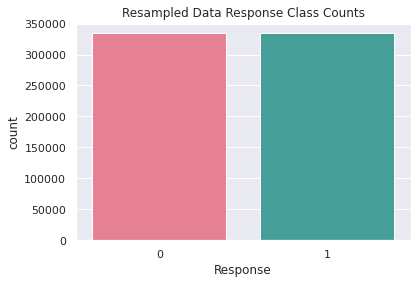

In [62]:
# plot target variable class count
sns.countplot(y_new,palette='husl')
plt.title('Resampled Data Response Class Counts')

### **Training and Testing sets**

Now that the classes are balanced, we can split the data into training and testing sets.

In [63]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.3, random_state = 23)

# printing shape
print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))

X_train shape (468158, 11)
y_train shape (468158,)
X_test shape (200640, 11)
y_test shape (200640,)


In [64]:
# standardising the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Model Selection**
#### This is a Binary Classification problem as we are attempting to predict whether the customers of the health insurance would also be interested in the vehicle insurance or not.

#### We are going to build multiple classification models:

#### **1. Logistic Regression**
#### **2. Decision Tree Classifier**
#### **2. Random Forest Classifier**
#### **3. XGBoost Classifier**

## **Logistic Regression**

We can use the Logistic Regression model from Scikit-learn. We will also perform hyperparameter tuning and cross validation  with GridSearchCV.

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# hyperparameter tuning and crossvalidation
parameters = {"penalty":['l1', 'l2', 'elasticnet', 'none'],"max_iter":[100,200,300]}
clf = GridSearchCV(LogisticRegression(), param_grid = parameters, scoring = 'accuracy', cv = 3)
# fitting the model
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [66]:
# best hyperparameter combination
clf.best_params_

{'max_iter': 100, 'penalty': 'l2'}

In [67]:
# class prediction on training and testing datasets
y_pred_lr = clf.predict(X_test)
y_train_pred_lr = clf.predict(X_train)

# probability prediction on training and testing datasets (only using probabilities of positive class)
y_prob_lr = clf.predict_proba(X_test)[:,1]
y_train_prob_lr = clf.predict_proba(X_train)[:,1]

In [68]:
y_pred_lr

array([1, 0, 1, ..., 0, 1, 1])

In [69]:
y_prob_lr

array([7.66318523e-01, 4.42854712e-04, 6.82451547e-01, ...,
       3.36665102e-04, 8.83271285e-01, 9.28151333e-01])

### **Model Performance**

The model can be evaluated using several metrics such as accuracy, precision, recall etc. In case of heavily unbalanced data, accuracy would have been a bad representation of model quality. But that problem is already handled here as we have balanced the dataset using SMOTE.

We can also create ROC curves (and calculate the area under the curves) which represent the classification ability of a model.

In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# model performance on testing data
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
test_precision_lr = precision_score(y_test, y_pred_lr)
test_recall_lr = recall_score(y_test, y_pred_lr)
test_f1_lr = f1_score(y_test, y_pred_lr)
# area under roc curve
test_roc_auc_score_lr = roc_auc_score(y_test, y_prob_lr)

#model performance on training data
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
train_precision_lr = precision_score(y_train, y_train_pred_lr)
train_recall_lr = recall_score(y_train, y_train_pred_lr)
train_f1_lr = f1_score(y_train, y_train_pred_lr)
# area under roc curve
train_roc_auc_score_lr = roc_auc_score(y_train, y_train_prob_lr)

In [71]:
#print performance metrics of testing data
print('Logistic Regression Testing Data Performance')
print("Accuracy : ", test_accuracy_lr)
print("Precision:", test_precision_lr)
print("Recall:", test_recall_lr)
print("F1-Score:", test_f1_lr)
print("Area Under the ROC Curve:", test_roc_auc_score_lr)

Logistic Regression Testing Data Performance
Accuracy :  0.8129834529505582
Precision: 0.7678609593666914
Recall: 0.8965045714057571
F1-Score: 0.8272111474896505
Area Under the ROC Curve: 0.8823323659504047


In [72]:
#print performance metrics of training data
print('Logistic Regression Training Data Performance')
print("Accuracy : ", train_accuracy_lr)
print("Precision:", train_precision_lr)
print("Recall:", train_recall_lr)
print("F1-Score:", train_f1_lr)
print("Area Under the ROC Curve:", train_roc_auc_score_lr)

Logistic Regression Training Data Performance
Accuracy :  0.8116362424651506
Precision: 0.7675457400302674
Recall: 0.89433886538207
F1-Score: 0.8261054757134519
Area Under the ROC Curve: 0.8803809380389155


The model performance on testing and training datasets are fairly similar. It gives around 81% accuracy, 76% precision and 89% recall. It has an F1 score of 0.82 and the area under ROC curve is 0.88.

#### **Classification Report**

Classification report presents the main classification metrics in a tabular form.

In [73]:
print('Logistic Regression Testing Data')
print(classification_report(y_test, y_pred_lr))
print('Logistic Regression Training Data')
print(classification_report(y_train, y_train_pred_lr))

Logistic Regression Testing Data
              precision    recall  f1-score   support

           0       0.88      0.73      0.80    100452
           1       0.77      0.90      0.83    100188

    accuracy                           0.81    200640
   macro avg       0.82      0.81      0.81    200640
weighted avg       0.82      0.81      0.81    200640

Logistic Regression Training Data
              precision    recall  f1-score   support

           0       0.87      0.73      0.79    233947
           1       0.77      0.89      0.83    234211

    accuracy                           0.81    468158
   macro avg       0.82      0.81      0.81    468158
weighted avg       0.82      0.81      0.81    468158



#### **Receiver operating characteristic (ROC) curve**

We will plot the ROC curve for both testing and training datasets. The area under the curves were calculated earlier and was found to be around 0.88 (88%) for both testing and training set.

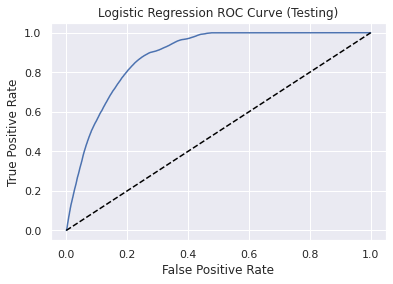

In [74]:
from sklearn.metrics import roc_curve
# Receiver operating characteristic (ROC) for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
# plot ROC curve
plt.title('Logistic Regression ROC Curve (Testing)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

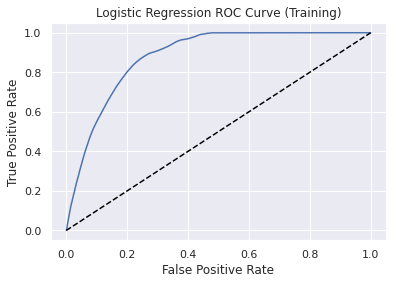

In [75]:
# Receiver operating characteristic (ROC) for training data
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob_lr)
# plot ROC curve
plt.title('Logistic Regression ROC Curve (Training)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

The performance of the model was found to be similar on both testing and training sets. So, the ROC curves are also similar (with same area under the curve).

#### **Confusion Matrix**

The prediction results are summarized in the form of confusion matrices for both testing and training sets.

[[73298 27154]
 [10369 89819]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

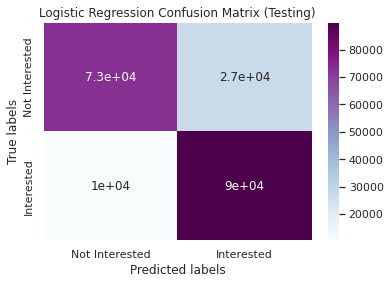

In [76]:
# confusion matrix for testing set
cm_test_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_test_lr)

ax = plt.subplot()
sns.heatmap(cm_test_lr, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix (Testing)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[170510  63437]
 [ 24747 209464]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

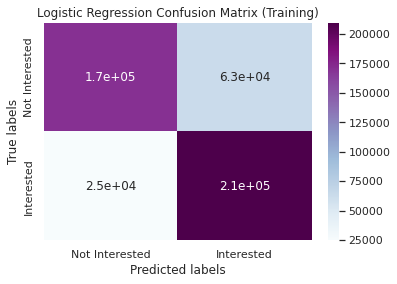

In [77]:
# confusion matrix for training set
cm_train_lr = confusion_matrix(y_train, y_train_pred_lr)
print(cm_train_lr)

ax = plt.subplot()
sns.heatmap(cm_train_lr, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix (Training)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Decision Tree Classifier**

Next, we build a Decision Tree Classifier and do hyperparameter tuning and cross validation as well.

In [78]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier(criterion = 'entropy', random_state = 32)

# hyperparameter tuning and cross validation
parameters = {'max_depth':[7,9,11], 'splitter':['best','random'], 'min_samples_split':[2,4]}
decisiontree = GridSearchCV(dtmodel, param_grid = parameters, scoring = 'accuracy', cv = 3)
# fitting the model
decisiontree.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=32),
             param_grid={'max_depth': [7, 9, 11], 'min_samples_split': [2, 4],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [79]:
# best hyperparameters
decisiontree.best_params_

{'max_depth': 11, 'min_samples_split': 2, 'splitter': 'best'}

In [80]:
# best accuracy score
decisiontree.best_score_

0.8395947525352154

In [81]:
# class predictions
y_pred_dt = decisiontree.predict(X_test)
y_train_pred_dt = decisiontree.predict(X_train)

# probability predictions (only of positive outcomes)
y_prob_dt = decisiontree.predict_proba(X_test)[:,1]
y_train_prob_dt = decisiontree.predict_proba(X_train)[:,1]

### **Model Performance**

We evaluated the model using the usual performance metrics.

In [82]:
# model performance on testing data
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
test_precision_dt = precision_score(y_test, y_pred_dt)
test_recall_dt = recall_score(y_test, y_pred_dt)
test_f1_dt = f1_score(y_test, y_pred_dt)
# area under roc curve
test_roc_auc_score_dt = roc_auc_score(y_test, y_prob_dt)

#model performance on training data
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
train_precision_dt = precision_score(y_train, y_train_pred_dt)
train_recall_dt = recall_score(y_train, y_train_pred_dt)
train_f1_dt = f1_score(y_train, y_train_pred_dt)
# area under roc curve
train_roc_auc_score_dt = roc_auc_score(y_train, y_train_prob_dt)

In [83]:
#print performance metrics of testing data
print('Decision Tree Testing Data Performance')
print("Accuracy : ", test_accuracy_dt)
print("Precision:", test_precision_dt)
print("Recall:", test_recall_dt)
print("F1-Score:", test_f1_dt)
print("Area Under the ROC Curve:", test_roc_auc_score_dt)

Decision Tree Testing Data Performance
Accuracy :  0.8408094098883573
Precision: 0.79916013536023
Recall: 0.9098594642072902
F1-Score: 0.8509246035079858
Area Under the ROC Curve: 0.9163508472943561


In [84]:
#print performance metrics of training data
print('Decision Tree Training Data Performance')
print("Accuracy : ", train_accuracy_dt)
print("Precision:", train_precision_dt)
print("Recall:", train_recall_dt)
print("F1-Score:", train_f1_dt)
print("Area Under the ROC Curve:", train_roc_auc_score_dt)

Decision Tree Training Data Performance
Accuracy :  0.8422455666676635
Precision: 0.8007524578664856
Recall: 0.9114644487235869
F1-Score: 0.8525291331538886
Area Under the ROC Curve: 0.9173890336823044


The model performance on testing and training datasets are fairly similar. For both testing and training data, it gives around 84% accuracy, 80% precision and 91% recall. It has an F1 score of 0.85 and the area under ROC curve is 0.91.

#### **Classification report**

In [85]:
print('Decision Tree Testing Data')
print(classification_report(y_test, y_pred_dt))
print('Decision Tree Training Data')
print(classification_report(y_train, y_train_pred_dt))

Decision Tree Testing Data
              precision    recall  f1-score   support

           0       0.90      0.77      0.83    100452
           1       0.80      0.91      0.85    100188

    accuracy                           0.84    200640
   macro avg       0.85      0.84      0.84    200640
weighted avg       0.85      0.84      0.84    200640

Decision Tree Training Data
              precision    recall  f1-score   support

           0       0.90      0.77      0.83    233947
           1       0.80      0.91      0.85    234211

    accuracy                           0.84    468158
   macro avg       0.85      0.84      0.84    468158
weighted avg       0.85      0.84      0.84    468158



#### **Receiver operating characteristic (ROC) Curve**

The ROC curve is plotted for both testing and training datasets. The area under the curves were calculated earlier and was found to be around 0.87 for both testing and training set.

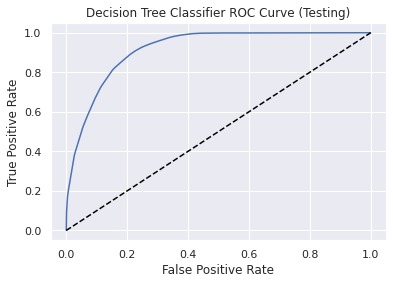

In [86]:
# Receiver operating characteristic (ROC) for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
# plot ROC curve
plt.title('Decision Tree Classifier ROC Curve (Testing)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

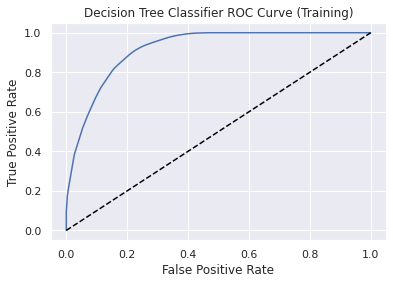

In [87]:
# Receiver operating characteristic (ROC) for training data
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob_dt)
# plot ROC curve
plt.title('Decision Tree Classifier ROC Curve (Training)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

The performance of the model was found to be similar on both testing and training sets. So, the ROC curves are also similar (with same area under the curve).

#### **Confusion matrix**

Confusion matrices that summarized the predictions were constructed.

[[77543 22909]
 [ 9031 91157]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

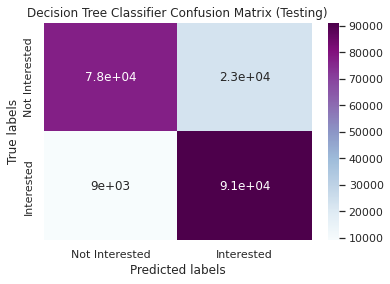

In [88]:
# confusion matrix for testing set
cm_test_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_test_dt)

ax = plt.subplot()
sns.heatmap(cm_test_dt, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Classifier Confusion Matrix (Testing)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[180829  53118]
 [ 20736 213475]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

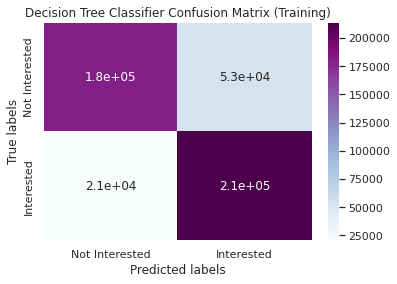

In [89]:
# confusion matrix for training set
cm_train_dt = confusion_matrix(y_train, y_train_pred_dt)
print(cm_train_dt)

ax = plt.subplot()
sns.heatmap(cm_train_dt, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Classifier Confusion Matrix (Training)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##**Random Forest Classifier**

Next we can build a Random Forest classifier. Random Forest is a tree ensemble model whose single model itself takes a good amount of time to run (due to the large data). We chose to not perform hyperparameter tuning and cross validation as that led to unreasonably long running times.

In [90]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state = 71, max_depth = 11, min_samples_split = 4, n_jobs = -1, criterion = 'entropy', n_estimators = 100)
# fitting the model
randomforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=4,
                       n_jobs=-1, random_state=71)

In [91]:
# class predictions
y_pred_rf = randomforest.predict(X_test)
y_train_pred_rf = randomforest.predict(X_train)

# probability predictions (only of positive outcomes)
y_prob_rf = randomforest.predict_proba(X_test)[:,1]
y_train_prob_rf = randomforest.predict_proba(X_train)[:,1]

### **Model Performance**

we evaluated the model using the usual metrics.

In [92]:
# model performance on testing data
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
test_precision_rf = precision_score(y_test, y_pred_rf)
test_recall_rf = recall_score(y_test, y_pred_rf)
test_f1_rf = f1_score(y_test, y_pred_rf)
# area under roc curve
test_roc_auc_score_rf = roc_auc_score(y_test, y_prob_rf)

#model performance on training data
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)
# area under roc curve
train_roc_auc_score_rf = roc_auc_score(y_train, y_train_prob_rf)

In [93]:
#print performance metrics of testing data
print('Random Forest Classifier Testing Data Performance')
print("Accuracy : ", test_accuracy_rf)
print("Precision:", test_precision_rf)
print("Recall:", test_recall_rf)
print("F1-Score:", test_f1_rf)
print("Area Under the ROC Curve:", test_roc_auc_score_rf)

Random Forest Classifier Testing Data Performance
Accuracy :  0.8378339314194577
Precision: 0.7859757695656953
Recall: 0.9279155188246098
F1-Score: 0.8510681149270606
Area Under the ROC Curve: 0.915622907941949


In [94]:
#print performance metrics of training data
print('Random Forest Classifier Training Data Performance')
print("Accuracy : ", train_accuracy_rf)
print("Precision:", train_precision_rf)
print("Recall:", train_recall_rf)
print("F1-Score:", train_f1_rf)
print("Area Under the ROC Curve:", train_roc_auc_score_rf)

Random Forest Classifier Training Data Performance
Accuracy :  0.8390372481085445
Precision: 0.7873965603957028
Recall: 0.9291280085051513
F1-Score: 0.8524109835872928
Area Under the ROC Curve: 0.9159499842346328


The model performance on testing and training datasets are fairly similar.

For both testing and training data, it gives around 84% accuracy, 79% precision and 93% recall. It has an F1 score of 0.85 and the area under ROC curve is 0.91.

#### **Classification Report**

Classification report presenting all the main performance metrics was created.

In [95]:
print('Random Forest Classifier Testing Data')
print(classification_report(y_test, y_pred_rf))
print('Random Forest Classifier Training Data')
print(classification_report(y_train, y_train_pred_rf))

Random Forest Classifier Testing Data
              precision    recall  f1-score   support

           0       0.91      0.75      0.82    100452
           1       0.79      0.93      0.85    100188

    accuracy                           0.84    200640
   macro avg       0.85      0.84      0.84    200640
weighted avg       0.85      0.84      0.84    200640

Random Forest Classifier Training Data
              precision    recall  f1-score   support

           0       0.91      0.75      0.82    233947
           1       0.79      0.93      0.85    234211

    accuracy                           0.84    468158
   macro avg       0.85      0.84      0.84    468158
weighted avg       0.85      0.84      0.84    468158



#### **Receiver operating characteristic (ROC) Curve**

The ROC curve is plotted for both testing and training datasets. The area under the curves were calculated earlier and was found to be around 0.89 (89%) for both testing and training set.

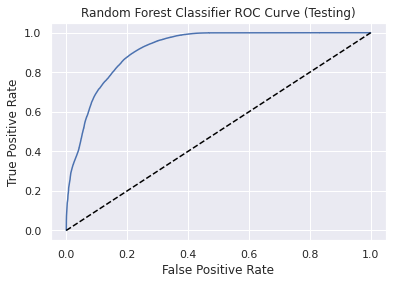

In [96]:
# Receiver operating characteristic (ROC) for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
# plot ROC curve
plt.title('Random Forest Classifier ROC Curve (Testing)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

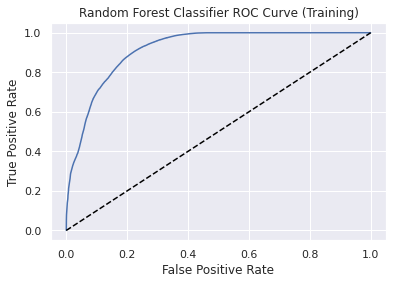

In [97]:
# Receiver operating characteristic (ROC) for training data
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob_rf)
# plot ROC curve
plt.title('Random Forest Classifier ROC Curve (Training)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

The performance of the model was found to be similar on both testing and training sets. So, the ROC curves are also similar (with same area under the curve).

#### **Confusion Matrix**

[[75137 25315]
 [ 7222 92966]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

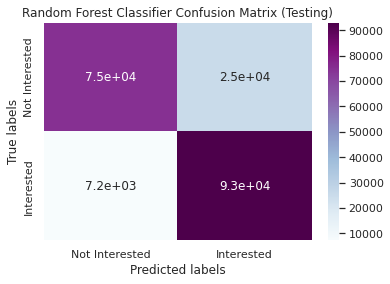

In [98]:
# confusion matrix for testing set
cm_test_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_test_rf)

ax = plt.subplot()
sns.heatmap(cm_test_rf, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Classifier Confusion Matrix (Testing)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[175190  58757]
 [ 16599 217612]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

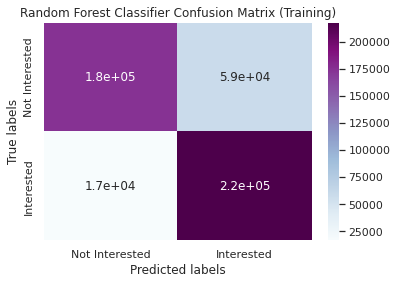

In [99]:
# confusion matrix for training set
cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
print(cm_train_rf)

ax = plt.subplot()
sns.heatmap(cm_train_rf, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Classifier Confusion Matrix (Training)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Feature Importance**

Let us find the most important features that contributed to the impurity reduction in the random forest model. 

Text(0.5, 0, 'Relative Importance')

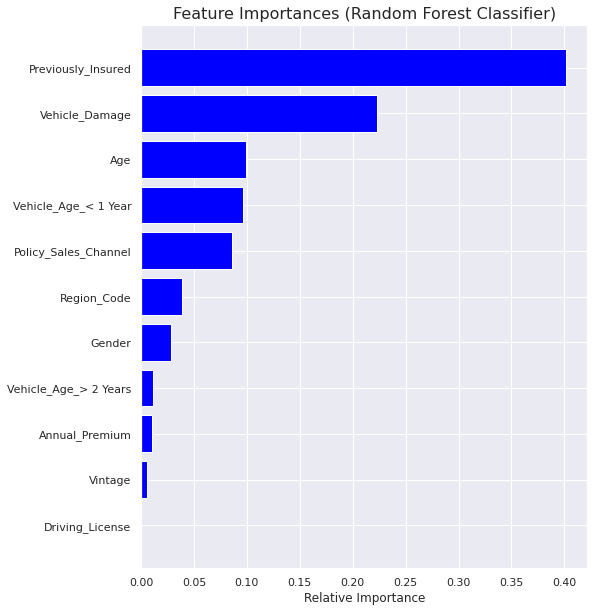

In [100]:
features = X.columns
# feature importance (array of importance value of each feature, values sum to 1)
importances = randomforest.feature_importances_
# indices
index = np.argsort(importances)

# plotting
plt.figure(figsize=(8,10))
plt.title('Feature Importances (Random Forest Classifier)', fontsize = 16)
plt.barh(range(len(index)), importances[index], color='blue', align='center')
plt.yticks(range(len(index)), features[index])
plt.xlabel('Relative Importance')

Previously Insured followed by Vehicle damage and Age features are the most important contributers. Vintage and Driving License are least important.

## **XGBoost Classifier**

Next we fit the XGBoost Classifier model. We don't do hyperparameter tuning and cross validation for the same reason as for Random Forest model.

In [101]:
from xgboost import XGBClassifier
xgb = XGBClassifier(seed = 12, use_label_encoder = False, objective = 'binary:logistic',
                    subsample = 0.9, colsample_bytree = 0.5,
                    max_depth = 7, learning_rate = 0.5, gamma = 0.25, reg_lambda = 1)
# fitting the model
xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.5, gamma=0.25, learning_rate=0.5, max_depth=7,
              seed=12, subsample=0.9, use_label_encoder=False)

In [102]:
# class predictions
y_pred_xgb = xgb.predict(X_test)
y_train_pred_xgb = xgb.predict(X_train)

# probability estimates
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
y_train_prob_xgb = xgb.predict_proba(X_train)[:,1]

### **Model Performance**

We evaluate the model with the performance metrics.

In [103]:
# model performance on testing data
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
test_precision_xgb = precision_score(y_test, y_pred_xgb)
test_recall_xgb = recall_score(y_test, y_pred_xgb)
test_f1_xgb = f1_score(y_test, y_pred_xgb)
# area under roc curve
test_roc_auc_score_xgb = roc_auc_score(y_test, y_prob_xgb)

#model performance on training data
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
train_precision_xgb = precision_score(y_train, y_train_pred_xgb)
train_recall_xgb = recall_score(y_train, y_train_pred_xgb)
train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
# area under roc curve
train_roc_auc_score_xgb = roc_auc_score(y_train, y_train_prob_xgb)

In [104]:
#print performance metrics of testing data
print('XGBoost Classifier Testing Data Performance')
print("Accuracy : ", test_accuracy_xgb)
print("Precision:", test_precision_xgb)
print("Recall:", test_recall_xgb)
print("F1-Score:", test_f1_xgb)
print("Area Under the ROC Curve:", test_roc_auc_score_xgb)

XGBoost Classifier Testing Data Performance
Accuracy :  0.8955492424242424
Precision: 0.9002252912116222
Recall: 0.8893979318880505
F1-Score: 0.894778858367935
Area Under the ROC Curve: 0.9701906636603901


In [105]:
#print performance metrics of training data
print('XGBoost Classifier Training Data Performance')
print("Accuracy : ", train_accuracy_xgb)
print("Precision:", train_precision_xgb)
print("Recall:", train_recall_xgb)
print("F1-Score:", train_f1_xgb)
print("Area Under the ROC Curve:", train_roc_auc_score_xgb)

XGBoost Classifier Training Data Performance
Accuracy :  0.9013431362915939
Precision: 0.9067459287333645
Recall: 0.8948256059706845
F1-Score: 0.900746331200856
Area Under the ROC Curve: 0.973350322391285


The XGBoost classifier has a similar performance for both testing and training datasets.

For both training and testing sets, it gives around 90% accuracy, 90% precision and 89% recall. It has an F1 score of 0.89 and the area under ROC curve is 0.969.

#### **Classification Report**

In [106]:
print('XGBoost Classifier Testing Data')
print(classification_report(y_test, y_pred_xgb))
print('XGBoost Classifier Training Data')
print(classification_report(y_train, y_train_pred_xgb))

XGBoost Classifier Testing Data
              precision    recall  f1-score   support

           0       0.89      0.90      0.90    100452
           1       0.90      0.89      0.89    100188

    accuracy                           0.90    200640
   macro avg       0.90      0.90      0.90    200640
weighted avg       0.90      0.90      0.90    200640

XGBoost Classifier Training Data
              precision    recall  f1-score   support

           0       0.90      0.91      0.90    233947
           1       0.91      0.89      0.90    234211

    accuracy                           0.90    468158
   macro avg       0.90      0.90      0.90    468158
weighted avg       0.90      0.90      0.90    468158



#### **Receiver operating characteristic (ROC) Curve**

The ROC curve is plotted for both testing and training datasets. The area under the curves were calculated earlier and was found to be around 0.92 (92%) for both testing and training set.

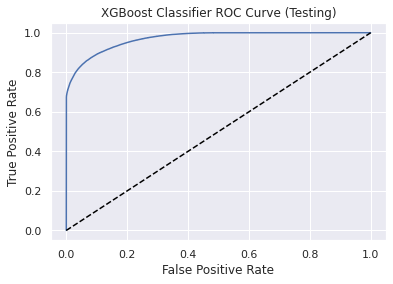

In [107]:
# Receiver operating characteristic (ROC) for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
# plot ROC curve
plt.title('XGBoost Classifier ROC Curve (Testing)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

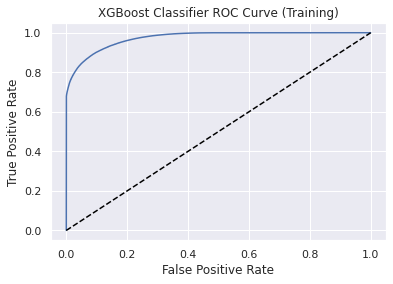

In [108]:
# Receiver operating characteristic (ROC) for training data
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob_xgb)
# plot ROC curve
plt.title('XGBoost Classifier ROC Curve (Training)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr)
plt.plot((0,1), ls = 'dashed', color = 'black')
plt.show()

The performance of the model was found to be similar on both testing and training sets. So, the ROC curves are also similar.

#### **Confusion Matrix**

[[90576  9876]
 [11081 89107]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

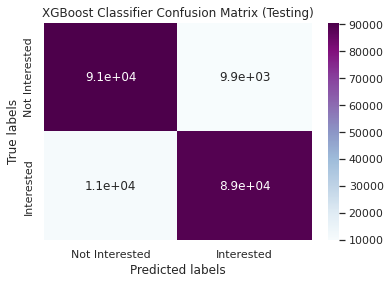

In [109]:
# confusion matrix for testing set
cm_test_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_test_xgb)

ax = plt.subplot()
sns.heatmap(cm_test_xgb, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('XGBoost Classifier Confusion Matrix (Testing)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[212393  21554]
 [ 24633 209578]]


[Text(0, 0.5, 'Not Interested'), Text(0, 1.5, 'Interested')]

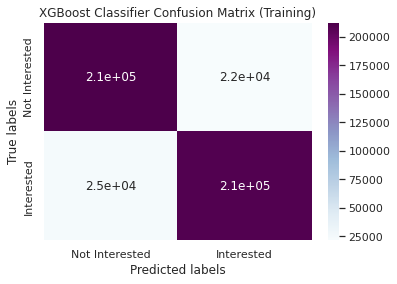

In [110]:
# confusion matrix for training set
cm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
print(cm_train_xgb)

ax = plt.subplot()
sns.heatmap(cm_train_xgb, annot = True, cmap = 'BuPu', ax = ax)

labels = ['Not Interested', 'Interested']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('XGBoost Classifier Confusion Matrix (Training)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Feature Importance**

Let us look at the important features of the XGBoost Classifier.

Text(0.5, 0, 'Relative Importance')

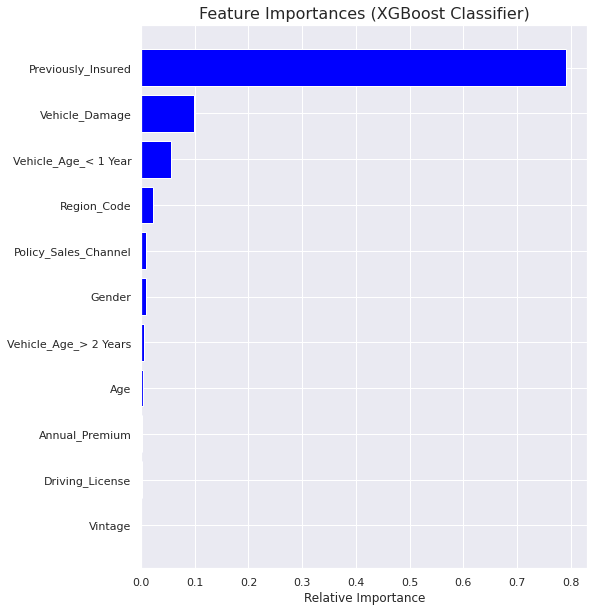

In [111]:
features = X.columns
# feature importance (array of importance value of each feature, values sum to 1)
importances = xgb.feature_importances_
# indices
index = np.argsort(importances)

# plotting
plt.figure(figsize=(8,10))
plt.title('Feature Importances (XGBoost Classifier)', fontsize = 16)
plt.barh(range(len(index)), importances[index], color='blue', align='center')
plt.yticks(range(len(index)), features[index])
plt.xlabel('Relative Importance')

The important features for this model is slightly different from that of the Random Forest model. Previously Insured followed by Vehicle Damage are the most important features. While driving license followed by Vintage are the least important. We can see that Gender is more important than Age in this model, whereas Age was more important than Gender in Random Forest model.

## **Model Comparison**

In [112]:
model_names = ['Logistic Regression','Decision Tree','Random Forest','XGBoost']
model_metrics ={"Accuracy":[test_accuracy_lr, test_accuracy_dt, test_accuracy_rf, test_accuracy_xgb],"Recall":[test_recall_lr,test_recall_dt,test_recall_rf,test_recall_xgb],"Precision":[test_precision_lr,test_precision_dt,test_precision_rf,test_precision_xgb],
    'f1_score':[test_f1_lr,test_f1_dt,test_f1_rf,test_f1_xgb],"ROC_AUC_Score":[test_roc_auc_score_lr,test_roc_auc_score_dt,test_roc_auc_score_rf,test_roc_auc_score_xgb]}
# dataframe for model metrics
results = pd.DataFrame(data = model_metrics,index = model_names)
results

,Accuracy,Recall,Precision,f1_score,ROC_AUC_Score
Logistic Regression,0.812983,0.896505,0.767861,0.827211,0.882332
Decision Tree,0.840809,0.909859,0.799160,0.850925,0.916351
Random Forest,0.837834,0.927916,0.785976,0.851068,0.915623
XGBoost,0.895549,0.889398,0.900225,0.894779,0.970191


Since the classes are balanced in our data, we can safely consider accuracy metric for comparing the models. The area under ROC and F1 score (harmonic mean of precision and recall) can also be used to make the comparison.

We can observe that the performance of all the models are close. But XGBoost classifier stands out in terms of accuracy (with a score of 0.895), F1 score (of 0.894) and area under ROC curve (score of 0.97). It is followed by Decision Tree and Random Forest model. Interestingly, Random Forest and Decision Tree has similar performance (with Decision tree having slightly higher accuracy).

The Logistic Regression model might be the worst out of them all (but only by a small margin).

Since our dataset contained more than 600k records (after oversampling), we were not able to build SVM and KNN Classifiers. With the increase in data size, these models were having very long runtime.

## **Conclusion**

1. Customers aged between 30 to 50 are more interested in the vehicle insurance compared to the youngsters.
2. The chance of customers with out Driving License being interested in buying insurance is very low.
3. There is very low chance that a person who is previously insured is interested in the insurance.
4. Most of the customers pay annual premium below 100,000.
5. Number of men with driving license is higher than women in the data. This further results in the number of interested customers being higher in men than women.
6. Most of the customers whose vehicle wasn't damaged before are not interested in the insurance
7. There is no perfect multicollinearity between any of the independent variables.
8. XGBoost Classifier stands out with an accuracy score of 0.89 and area under ROC curve of 0.97.
9. The Random forest and decision tree classifier has almost similar performance (in terms of accuracy and ROC score).
10. The logistic regression model is the worst of them all (by a small margin).
11. There are some differences in the feature importances of Random Forest model and XGBoost model. But 'Previously Insured' followed by 'Vehicle Damage' are the most important features for both.